<h1> Exercise 1: Perceptron Implementation

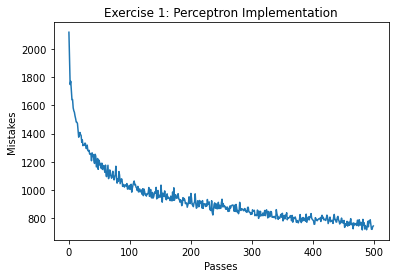

In [4]:
import numpy
import matplotlib.pyplot as plt
def plotGraph(data, xlabel, ylabel, title, filename, ymin=-1, ymax=-1):
	plt.plot(data)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.title(title)
	if ymin != -1:
		plt.ylim(ymin=ymin)
	if ymax != -1:
		plt.ylim(ymax=ymax)
	plt.savefig(filename)
	plt.clf()


def perceptron(X, y, w, b, max_pass = 500):
    mistake = [0]*max_pass
    n = len(y)
    for t in range(0, max_pass):
        mistake[t] = 0
        for i in range(0, n):
            if (y[i] * (numpy.dot(X[i], w) + b) <= 0):
                w = numpy.add(w, numpy.multiply(y[i],X[i]))
                b += y[i]
                mistake[t]+=1
    return w, b, mistake

spambase_X = numpy.matrix.transpose(numpy.genfromtxt('spambase_X.csv', delimiter=','))
spambase_y = numpy.genfromtxt('spambase_y.csv', delimiter=',')
w = numpy.zeros(len(spambase_X[0]))
b = 0
w,b,mistakes = perceptron(spambase_X, spambase_y, w, b, 500)
plt.plot(mistakes)
plt.title('Exercise 1: Perceptron Implementation')
plt.xlabel('Passes')
plt.ylabel('Mistakes')
plt.savefig('a1q1_perceptron.png', transparent=False)


<h1> Exercise 3: Playing with Regression

Average Mean Squared Error for Set A using Linear Regression is: 3.2474001735563336
Average Mean Squared Error for Set A using Ridge Regression 1 is: 3.1393937714571583
Average Mean Squared Error for Set A using Ridge Regression 10 is: 2.778034132092459
Average Mean Squared Error for Set A using Lasso 1 is: 3.020398627748416
Average Mean Squared Error for Set A using Lasso 10 is: 3.602632561104983
Best performer of set A is: Ridge Regression 10
Average Mean Squared Error for Set B using Linear Regression is: 2.7426823746517077
Average Mean Squared Error for Set B using Ridge Regression 1 is: 2.616205111992319
Average Mean Squared Error for Set B using Ridge Regression 10 is: 2.0597132198546957
Average Mean Squared Error for Set B using Lasso 1 is: 2.265165239893118
Average Mean Squared Error for Set B using Lasso 10 is: 1.8096725417753268
Best performer of set B is: Lasso 10
Average Mean Squared Error for Set C using Linear Regression is: 507.7516187628963
Average Mean Squared Error fo

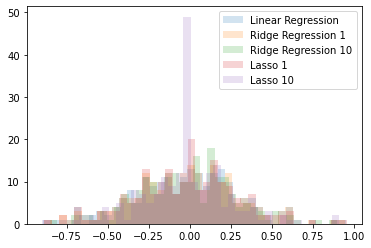

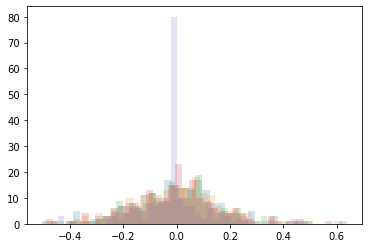

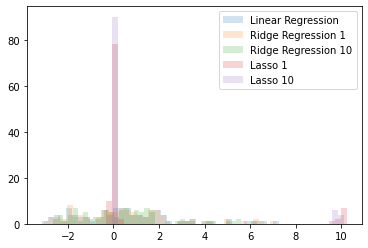

In [43]:
import numpy
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_test_A = numpy.genfromtxt('X_test_A.csv', delimiter=',')
X_test_B = numpy.genfromtxt('X_test_B.csv', delimiter=',')
X_test_C = numpy.genfromtxt('X_test_C.csv', delimiter=',')

X_train_A = numpy.genfromtxt('X_train_A.csv', delimiter=',')
X_train_B = numpy.genfromtxt('X_train_B.csv', delimiter=',')
X_train_C = numpy.genfromtxt('X_train_C.csv', delimiter=',')

Y_test_A = numpy.genfromtxt('Y_test_A.csv', delimiter=',')
Y_test_B = numpy.genfromtxt('Y_test_B.csv', delimiter=',')
Y_test_C = numpy.genfromtxt('Y_test_C.csv', delimiter=',')

Y_train_A = numpy.genfromtxt('Y_train_A.csv', delimiter=',')
Y_train_B = numpy.genfromtxt('Y_train_B.csv', delimiter=',')
Y_train_C = numpy.genfromtxt('Y_train_C.csv', delimiter=',')

def linReg(X, y, testX, testy):
    reg = LinearRegression().fit(X, y)
    pre = reg.predict(testX)
    return reg.coef_, mean_squared_error(pre, testy)

def ridge(X, y, testX, testy, reg):
    clf = Ridge(alpha = reg)
    clf.fit(X, y)
    pre = clf.predict(testX)
    return clf.coef_, mean_squared_error(testy, pre)

def lasso(X, y, testX, testy, reg):
    # since lasso optimization objective is (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
    # 
    n = len(y)
    clf = Lasso(alpha = reg/n)
    clf.fit(X, y)
    pre = clf.predict(testX)
    return clf.coef_, mean_squared_error(testy, pre)

def setA():
    wLinReg, resLinReg = linReg(X_train_A, Y_train_A, X_test_A, Y_test_A)
    print("Average Mean Squared Error for Set A using Linear Regression is:", resLinReg)
    wRidge1, resRidge1 = ridge(X_train_A, Y_train_A, X_test_A, Y_test_A, 1)
    print("Average Mean Squared Error for Set A using Ridge Regression 1 is:", resRidge1)
    wRidge10, resRidge10 = ridge(X_train_A, Y_train_A, X_test_A, Y_test_A, 10)
    print("Average Mean Squared Error for Set A using Ridge Regression 10 is:", resRidge10)
    wLasso1, resLasso1 = lasso(X_train_A, Y_train_A, X_test_A, Y_test_A, 1)
    print("Average Mean Squared Error for Set A using Lasso 1 is:", resLasso1)
    wLasso10, resLasso10 = lasso(X_train_A, Y_train_A, X_test_A, Y_test_A, 10)
    print("Average Mean Squared Error for Set A using Lasso 10 is:", resLasso10)
    best = min(resLinReg, resRidge1, resRidge10, resLasso1, resLasso10)
    print("Best performer of set A is: ", end='')
    if (best == resLinReg):
        print("Linear Regression")
    elif (best == resRidge1):
        print("Ridge Regression 1")
    elif (best == resRidge10):
        print("Ridge Regression 10")
    elif (best == resLasso1):
        print("Lasso 1")
    elif (best == resLasso10):
        print("Lasso 10")
    kwargs = dict(histtype='stepfilled', alpha = 0.2, bins=40)
    figA = plt.figure()
    plt.hist(wLinReg, **kwargs, label = 'Linear Regression')
    plt.hist(wRidge1, **kwargs, label = 'Ridge Regression 1')
    plt.hist(wRidge10, **kwargs, label = 'Ridge Regression 10')
    plt.hist(wLasso1, **kwargs, label = 'Lasso 1')
    plt.hist(wLasso10, **kwargs, label = 'Lasso 10')
    plt.legend(loc='upper right')
    plt.title
    figA.savefig('setA.png', facecolor='w', edgecolor='w')
    

def setB():
    wLinReg, resLinReg = linReg(X_train_B, Y_train_B, X_test_B, Y_test_B)
    print("Average Mean Squared Error for Set B using Linear Regression is:", resLinReg)
    wRidge1, resRidge1 = ridge(X_train_B, Y_train_B, X_test_B, Y_test_B, 1)
    print("Average Mean Squared Error for Set B using Ridge Regression 1 is:", resRidge1)
    wRidge10, resRidge10 = ridge(X_train_B, Y_train_B, X_test_B, Y_test_B, 10)
    print("Average Mean Squared Error for Set B using Ridge Regression 10 is:", resRidge10)
    wLasso1, resLasso1 = lasso(X_train_B, Y_train_B, X_test_B, Y_test_B, 1)
    print("Average Mean Squared Error for Set B using Lasso 1 is:", resLasso1)
    wLasso10, resLasso10 = lasso(X_train_B, Y_train_B, X_test_B, Y_test_B, 10)
    print("Average Mean Squared Error for Set B using Lasso 10 is:", resLasso10)
    best = min(resLinReg, resRidge1, resRidge10, resLasso1, resLasso10)
    print("Best performer of set B is: ", end='')
    if (best == resLinReg):
        print("Linear Regression")
    elif (best == resRidge1):
        print("Ridge Regression 1")
    elif (best == resRidge10):
        print("Ridge Regression 10")
    elif (best == resLasso1):
        print("Lasso 1")
    elif (best == resLasso10):
        print("Lasso 10")
    figB = plt.figure()
    kwargs = dict(histtype='stepfilled', alpha = 0.2, bins=40)
    plt.hist(wLinReg, **kwargs, label = 'Linear Regression')
    plt.hist(wRidge1, **kwargs, label = 'Ridge Regression 1')
    plt.hist(wRidge10, **kwargs, label = 'Ridge Regression 10')
    plt.hist(wLasso1, **kwargs, label = 'Lasso 1')
    plt.hist(wLasso10, **kwargs, label = 'Lasso 10')
    plt.title
    figB.savefig('setB.png', facecolor='w', edgecolor='w')
    

def setC():
    wLinReg, resLinReg = linReg(X_train_C, Y_train_C, X_test_C, Y_test_C)
    print("Average Mean Squared Error for Set C using Linear Regression is:", resLinReg)
    wRidge1, resRidge1 = ridge(X_train_C, Y_train_C, X_test_C, Y_test_C, 1)
    print("Average Mean Squared Error for Set C using Ridge Regression 1 is:", resRidge1)
    wRidge10, resRidge10 = ridge(X_train_C, Y_train_C, X_test_C, Y_test_C, 10)
    print("Average Mean Squared Error for Set C using Ridge Regression 10 is:", resRidge10)
    wLasso1, resLasso1 = lasso(X_train_C, Y_train_C, X_test_C, Y_test_C, 1)
    print("Average Mean Squared Error for Set C using Lasso 1 is:", resLasso1)
    wLasso10, resLasso10 = lasso(X_train_C, Y_train_C, X_test_C, Y_test_C, 10)
    print("Average Mean Squared Error for Set C using Lasso 10 is:", resLasso10)
    best = min(resLinReg, resRidge1, resRidge10, resLasso1, resLasso10)
    print("Best performer of set C is: ", end='')
    if (best == resLinReg):
        print("Linear Regression")
    elif (best == resRidge1):
        print("Ridge Regression 1")
    elif (best == resRidge10):
        print("Ridge Regression 10")
    elif (best == resLasso1):
        print("Lasso 1")
    elif (best == resLasso10):
        print("Lasso 10")
    figC = plt.figure()
    kwargs = dict(histtype='stepfilled', alpha = 0.2, bins=40)
    plt.hist(wLinReg, **kwargs, label = 'Linear Regression')
    plt.hist(wRidge1, **kwargs, label = 'Ridge Regression 1')
    plt.hist(wRidge10, **kwargs, label = 'Ridge Regression 10')
    plt.hist(wLasso1, **kwargs, label = 'Lasso 1')
    plt.hist(wLasso10, **kwargs, label = 'Lasso 10')
    plt.legend(loc='upper right')
    plt.title
    figC.savefig('setC.png', facecolor='w', edgecolor='w')
    
setA()
setB()
setC()

<h1> Question 4

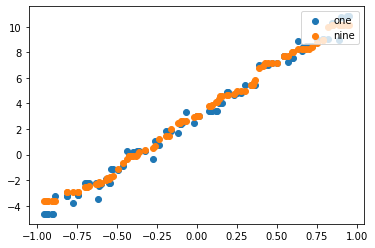

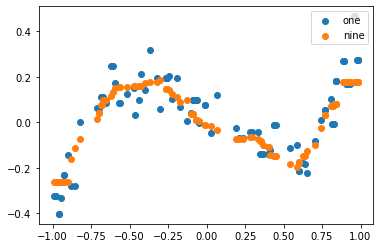

In [25]:
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_test_D = numpy.genfromtxt('X_test_D.csv', delimiter='\n')
X_test_E = numpy.genfromtxt('X_test_E.csv', delimiter='\n')
X_test_F = numpy.genfromtxt('X_test_F.csv', delimiter='\n')

X_train_D = numpy.genfromtxt('X_train_D.csv', delimiter='\n')
X_train_E = numpy.genfromtxt('X_train_E.csv', delimiter='\n')
X_train_F = numpy.genfromtxt('X_train_F.csv', delimiter='\n')

Y_test_D = numpy.genfromtxt('Y_test_D.csv', delimiter='\n')
Y_test_E = numpy.genfromtxt('Y_test_E.csv', delimiter='\n')
Y_test_F = numpy.genfromtxt('Y_test_F.csv', delimiter='\n')

Y_train_D = numpy.genfromtxt('Y_train_D.csv', delimiter=',')
Y_train_E = numpy.genfromtxt('Y_train_E.csv', delimiter='\n')
Y_train_F = numpy.genfromtxt('Y_train_F.csv', delimiter='\n')

def partition(arr, l, r):
     
    x = arr[r]
    i = l
    for j in range(l, r):
         
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
             
    arr[i], arr[r] = arr[r], arr[i]
    return i

def kthSmallest(arr, l, r, k):

    if (k > 0 and k <= r - l + 1):
        index = partition(arr, l, r)
        if (index - l == k - 1):
            return arr[index]
        if (index - l > k - 1):
            return kthSmallest(arr, l, index - 1, k)
        return kthSmallest(arr, index + 1, r,
                            k - index + l - 1)
    return INT_MAX

def knn(X, y, x, k):
    n = len(y)
    d = []
    for i in range(n):
        d.append(numpy.linalg.norm(x - X[i]))
    diff = d[:]
    kth = kthSmallest(diff, 0, n - 1, k)
    aggrigate = 0
    counter = 0
    for j in range(n):
        if (d[j] <= kth):
            aggrigate = aggrigate + y[j]
    return aggrigate / k

def linReg(X, y, testX, testy):
    reg = LinearRegression().fit(X, y)
    pre = reg.predict(testX)
    return reg.coef_, mean_squared_error(pre, testy)

estimateD1 = []
for t in X_test_D:
    estimateD1.append(knn(X_train_D, Y_train_D, t, 1))
estimateD9 = []
for t in X_test_D:
    estimateD9.append(knn(X_train_D, Y_train_D, t, 9))
figD = plt.figure()
plt.scatter(X_test_D, estimateD1, label='one')
plt.scatter(X_test_D, estimateD9, label='nine')
plt.legend(loc='upper right')
figD.savefig('a1q4figD.png')

estimateE1 = []
for t in X_test_E:
    estimateE1.append(knn(X_train_E, Y_train_E, t, 1))
estimateE9 = []
for t in X_test_E:
    estimateE9.append(knn(X_train_E, Y_train_E, t, 9))
figE = plt.figure()
plt.scatter(X_test_E, estimateE1, label='one')
plt.scatter(X_test_E, estimateE9, label='nine')
plt.legend(loc='upper right')
figE.savefig('a1q4figE.png')
